In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) =keras.datasets.mnist.load_data()

In [ ]:
X_train
print(X_train.shape)

(60000, 28, 28)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0] #pixel values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

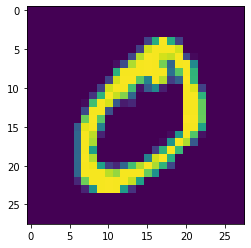

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

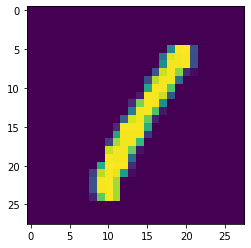

In [ ]:
plt.imshow(X_train[3])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation ='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer ='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=40,validation_split=0.2)

Epoch 1/40
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2840 - accuracy: 0.9170 - val_loss: 0.1416 - val_accuracy: 0.9594
Epoch 2/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1203 - accuracy: 0.9636 - val_loss: 0.1109 - val_accuracy: 0.9673
Epoch 3/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.9741 - val_loss: 0.0904 - val_accuracy: 0.9718
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0626 - accuracy: 0.9805 - val_loss: 0.1187 - val_accuracy: 0.9670
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.1023 - val_accuracy: 0.9707
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0981 - val_accuracy: 0.9726
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0913 - val_accurac

In [ ]:
y_prob = model.predict(X_test)

In [ ]:
y_preb = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preb)

0.9756

In [ ]:
import matplotlib.pyplot as plt

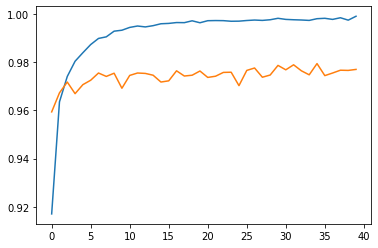

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

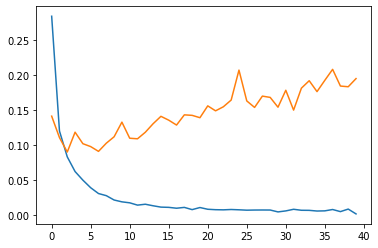

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

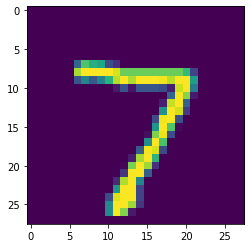

In [ ]:
plt.imshow(X_test[0])

In [ ]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

array([7])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])